In [15]:
import sys 
import os 
import string as s 
import json 
from sqlalchemy import * 
import numpy as np

from datetime import * 
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [120]:
# original dataset
#df = pd.read_csv('C:\Users\cwang\Documents\Training\DataScience\Project\ProjectRawData.csv')

# the one removed with high covariance variable
df = pd.read_csv('C:\Users\cwang\Documents\Training\DataScience\Project\ProjectRawDataCleanUp.csv')

In [121]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63807 entries, 0 to 63806
Data columns (total 63 columns):
netbillthroughquantity                 63807 non-null int64
regtype                                63807 non-null object
signupsubscription                     63807 non-null object
entrypage                              63807 non-null object
device                                 63807 non-null object
firstactivity24houraftersignup         63807 non-null object
firstactivity2houraftersignup          63807 non-null object
lastofferpage                          63807 non-null object
sessioncount24                         63807 non-null int64
sessioncount2hr                        63807 non-null int64
firstsessionlength                     63807 non-null int64
secondsessionlength                    63807 non-null int64
createtreebeforesignup                 63807 non-null int64
searchvolumebeforesignup               63807 non-null int64
contentviewimagebeforesignup           63807

In [122]:
df.describe()

,netbillthroughquantity,sessioncount24,sessioncount2hr,firstsessionlength,secondsessionlength,createtreebeforesignup,searchvolumebeforesignup,contentviewimagebeforesignup,contentviewimagedbbeforesignup,contentviewtextbeforesignup,...,personoverviewnodesin2hours,dbcitationcountin2hours,hintsdbcitationcountin2hours,searchdbcitationcountin2hours,dbcitationnodescountin2hours,dbcitationdatabasecountin2hours,createnodesfromhintsin2hours,createnodesfromsearchin2hours,createnodesfromotherin2hours,age
count,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,...,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000
mean,0.414108,1.767580,1.019684,52.187268,17.673907,0.196859,0.056875,0.078424,0.046938,0.132415,...,2.415017,9.059946,6.100005,2.424060,5.517482,2.332268,2.701271,1.036093,0.613773,21.842259
std,0.492571,1.443908,0.443273,68.669634,46.106396,0.397628,0.231605,0.913059,0.232544,1.346709,...,4.854300,60.370267,20.944900,6.877242,27.453810,4.477975,12.534133,4.840295,73.741663,44.832175
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7983.000000
25%,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,1.000000,2.000000,1.000000,68.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,5.000000,2.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,38.000000
max,1.000000,14.000000,4.000000,952.000000,1008.000000,1.000000,1.000000,110.000000,4.000000,96.000000,...,264.000000,13214.000000,569.000000,230.000000,5399.000000,248.000000,559.000000,742.000000,17977.000000,1688.000000


In [123]:
df['y']= df.netbillthroughquantity

In [124]:
#Explore Categorical variable

categorical_variables = ['regtype','signupsubscription','entrypage','device',
                   'firstactivity24houraftersignup','firstactivity2houraftersignup','lastofferpage']

df.entrypage.fillna('Unknown',inplace=True)
df.device.fillna('Unknown',inplace=True)
df.lastofferpage.fillna('Unknown',inplace=True)

for x in np.arange(len(categorical_variables)):
    print 'x:', x, ' feature name: ', categorical_variables[x]
    print df[categorical_variables[x]].value_counts()
    print df.groupby(categorical_variables[x]).y.mean().order(ascending = False)
    



x: 0  feature name:  regtype
FT Signup    49137
Merlin       10510
Other         4160
dtype: int64
regtype
Merlin       0.533777
Other        0.489663
FT Signup    0.382115
Name: y, dtype: float64
x: 1  feature name:  signupsubscription
USDeluxe       53459
WorldDeluxe    10348
dtype: int64
signupsubscription
USDeluxe              0.419836
WorldDeluxe           0.384519
Name: y, dtype: float64
x: 2  feature name:  entrypage
Loggged Out HomePage        26543
Other                       14579
Secure Stack                 6500
Marketing Landing Pages      3369
(null)                       3238
Search Results               2852
family facts                 2041
records                      1277
Search Forms                 1243
Merlin                        675
Logged in HomePage            643
DNA                           361
message boards                304
Trees                         109
Help/FAQ                       29
Help and Advice Articles       24
Online Community Support    

In [125]:
#encode features 
from sklearn import preprocessing
from sklearn.preprocessing import scale

df_numerical = df.copy()
encoder_dict = {}

for col in categorical_variables:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    encoder_dict[col] = le
    df_numerical[col] = le.transform(df[col])

# df_numerical.head()
# For numerical variables, normalize data and study their covariance.


df_norm = pd.DataFrame(scale(df_numerical.ix[:, 6:]),columns= df_numerical.ix[:, 6:].columns)


C:\Users\cwang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:145: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_
C:\Users\cwang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:158: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_1
C:\Users\cwang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:160: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr /= std_
C:\Users\cwang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:174: DeprecationWarning: Implicitly casting between incompatible

In [126]:
df_norm.describe()

,firstactivity2houraftersignup,lastofferpage,sessioncount24,sessioncount2hr,firstsessionlength,secondsessionlength,createtreebeforesignup,searchvolumebeforesignup,contentviewimagebeforesignup,contentviewimagedbbeforesignup,...,dbcitationcountin2hours,hintsdbcitationcountin2hours,searchdbcitationcountin2hours,dbcitationnodescountin2hours,dbcitationdatabasecountin2hours,createnodesfromhintsin2hours,createnodesfromsearchin2hours,createnodesfromotherin2hours,age,y
count,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807,63807,63807.000000,63807.000000,...,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807
mean,0.076308,0.041375,0.040121,0.003181,0.088000,0.098767,0,0,0.021095,0.000737,...,0.018713,0.093093,0.083596,0.033836,0.069287,0.080508,0.052502,0.006614,0.006347,0
std,0.265493,0.204208,0.265665,0.057961,0.498735,0.600410,0,0,0.852171,0.055560,...,0.918365,0.702816,0.628799,0.873785,0.486032,0.754153,0.793353,0.988724,0.837074,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-178.000000,0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
max,1.000000,2.000000,6.000000,3.000000,12.000000,20.000000,0,0,117.000000,7.000000,...,217.000000,25.000000,31.000000,195.000000,53.000000,43.000000,151.000000,242.000000,36.000000,0


In [73]:
# produce covance matrix 
df_cov = df_norm.cov()
df_cov.to_csv('C:\Users\cwang\Documents\Training\DataScience\Project\CovMatrix.csv')

#Remove columns have high covariance and create dataset at ProjectRawDataCleanUp.csv

<class 'pandas.core.frame.DataFrame'>


In [127]:
#Get model dataset
X = pd.DataFrame(df_numerical.ix[:, 1:62],columns= df_numerical.ix[:, 1:62].columns)
y = df_numerical.y
X.describe()

,regtype,signupsubscription,entrypage,device,firstactivity24houraftersignup,firstactivity2houraftersignup,lastofferpage,sessioncount24,sessioncount2hr,firstsessionlength,...,personoverviewtreesin2hours,personoverviewnodesin2hours,dbcitationcountin2hours,hintsdbcitationcountin2hours,searchdbcitationcountin2hours,dbcitationnodescountin2hours,dbcitationdatabasecountin2hours,createnodesfromhintsin2hours,createnodesfromsearchin2hours,createnodesfromotherin2hours
count,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,...,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000
mean,0.295109,0.162177,7.348379,3.685693,7.297538,7.297538,4.071904,1.767580,1.019684,52.187268,...,0.939991,2.415017,9.059946,6.100005,2.424060,5.517482,2.332268,2.701271,1.036093,0.613773
std,0.581737,0.368616,3.507075,1.017429,4.574720,4.574720,2.687236,1.443908,0.443273,68.669634,...,1.507835,4.854300,60.370267,20.944900,6.877242,27.453810,4.477975,12.534133,4.840295,73.741663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,4.000000,5.000000,5.000000,6.000000,1.000000,1.000000,29.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,9.000000,4.000000,12.000000,12.000000,6.000000,2.000000,1.000000,68.000000,...,1.000000,3.000000,5.000000,2.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,16.000000,5.000000,13.000000,13.000000,11.000000,14.000000,4.000000,952.000000,...,42.000000,264.000000,13214.000000,569.000000,230.000000,5399.000000,248.000000,559.000000,742.000000,17977.000000


In [128]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             accuracy_score, roc_auc_score)
from sklearn.tree import export_graphviz

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.60262968338758149, 0.61198601616239279, 0.61391371199326272, 0.61418027283028453, 0.61524597583946572, 0.61574772252509802, 0.61245657450694524, 0.61184516154483104, 0.60947860404984877, 0.60805225949277464, 0.60474532945166815, 0.60266084469031611, 0.59949501731520138, 0.59857057415158865, 0.59433915184215558, 0.59291277042363821, 0.58890062173319935, 0.58617357742124665]


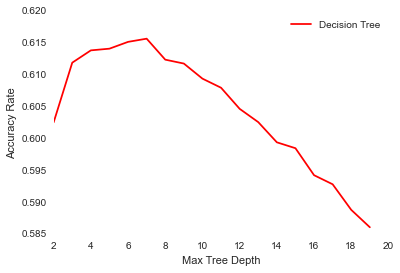

In [130]:

# use original dataset to build model
x_axis = []
y_axis = []
for k in range(20)[2:]:
    dtc = DecisionTreeClassifier(max_depth=k, random_state=1)
    scores = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
    #print 'For max depth:', k
    x_axis.append(k)
    #print 'Decision tree accuracy: {}'.format(np.mean(scores))
    y_axis.append(np.mean(scores))

print x_axis
print y_axis

ig, ax = plt.subplots(1,1)
ax.plot(x_axis, y_axis, color='red', label = 'Decision Tree ')
ax.set_ylabel('Accuracy Rate')
ax.set_xlabel('Max Tree Depth')
ax.legend(loc='upper right',frameon=True)



In [131]:
#Chose tree depth of 7 since it generates the best accurate rate
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X, y)
y_pred = treeclf.predict(X)

#print confusion matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat )

#print out top 10 features
pd_features = pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_}).sort(['importance'], ascending=False)
print pd_features.iloc[:10,]

#calculate true positive rate and false postive rate
y_comb = pd.DataFrame({'y':y, 'y_pred':y_pred }) 

#true positive rate
print 'True Positive Rate:', y_comb[y_comb.y == 1].y_pred.mean()
#false positive rate
print 'False Positive Rate:', y_comb[y_comb.y == 0].y_pred.mean()

[[29700  7684]
 [15764 10659]]
                           feature  importance
27      personahintsgeneratedcount    0.290021
0                          regtype    0.146357
10             secondsessionlength    0.127697
9               firstsessionlength    0.100581
6                    lastofferpage    0.059052
3                           device    0.044787
2                        entrypage    0.036210
1               signupsubscription    0.020450
24  totalpendinghintscountatsignup    0.018515
41             searchcountin2hours    0.016284
True Positive Rate: 0.40339855429
False Positive Rate: 0.205542478065


In [107]:
def plot_roc_curve(y_test, p_proba):
    # calculates: false positive rate, true positive rate, 
    fpr, tpr, thresholds = roc_curve(y_test, p_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= 'AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

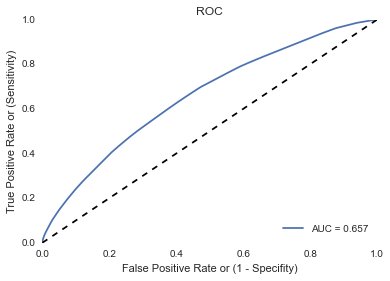

In [132]:
#ROC curve
p_proba = treeclf.predict_proba(X)
plot_roc_curve(y, p_proba)

In [119]:
with open("Images/CindyProject.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=X.columns)
    